# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = (city_weather["dt"])
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | paamiut
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | washington
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | general roca
Processing Record 8 of Set 1 | norman wells
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | sembe
Processing Record 16 of Set 1 | zeya
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | beira
Processing Record 20 of Set 1 | ocos
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | airai
Proce

Processing Record 36 of Set 4 | adrar
Processing Record 37 of Set 4 | hailey
Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | xichang
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | bulgan
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | chernyshevskiy
Processing Record 46 of Set 4 | salem
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | pierre
Processing Record 49 of Set 4 | puerto escondido
Processing Record 0 of Set 5 | shingu
Processing Record 1 of Set 5 | aneho
Processing Record 2 of Set 5 | neepawa
Processing Record 3 of Set 5 | kolokani
Processing Record 4 of Set 5 | sao joao da barra
Processing Record 5 of Set 5 | sunggal
Processing Record 6 of Set 5 | hyeres
Processing Record 7 of Set 5 | gimli
Processing Record 8 of Set 5 | along
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5

Processing Record 28 of Set 8 | otjiwarongo
Processing Record 29 of Set 8 | shieli
Processing Record 30 of Set 8 | salinopolis
Processing Record 31 of Set 8 | ndende
Processing Record 32 of Set 8 | lucapa
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | lebu
Processing Record 36 of Set 8 | ziro
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | kulhudhuffushi
Processing Record 39 of Set 8 | kaitangata
Processing Record 40 of Set 8 | harboore
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | holetown
Processing Record 44 of Set 8 | pilao arcado
City not found. Skipping...
Processing Record 45 of Set 8 | iturama
Processing Record 46 of Set 8 | shuya
Processing Record 47 of Set 8 | sundsvall
Processing Record 48 of Set 8 | caohai
Processing Record 49 of Set 8 | kavieng
Processing Record 0 of Set 9 | college
Processing Record 1 of 

Processing Record 13 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 12 | rzhaksa
Processing Record 15 of Set 12 | garmsar
Processing Record 16 of Set 12 | kilindoni
Processing Record 17 of Set 12 | elko
Processing Record 18 of Set 12 | honiara
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | khakhea
Processing Record 21 of Set 12 | luau
Processing Record 22 of Set 12 | gambiran
Processing Record 23 of Set 12 | olinda
Processing Record 24 of Set 12 | palaikastron
Processing Record 25 of Set 12 | tommot
Processing Record 26 of Set 12 | erenhot
Processing Record 27 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 12 | qasigiannguit
Processing Record 29 of Set 12 | mahon
Processing Record 30 of Set 12 | chadiza
Processing Record 31 of Set 12 | trairi
Processing Record 32 of Set 12 | gujar khan
Processing Record 33 of Set 12 | port hedland
Processing Record 34 of Set 12 | nelson bay
Processing Record 35 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,55.51,88,75,19.57,CL,1675555628
1,paamiut,61.9940,-49.6678,20.73,77,100,16.46,GL,1675555598
2,tasiilaq,65.6145,-37.6368,24.96,93,100,30.06,GL,1675555537
3,washington,47.5001,-120.5015,40.59,82,100,2.71,US,1675555500
4,hobart,-42.8794,147.3294,73.06,51,10,1.99,AU,1675555629
5,new norfolk,-42.7826,147.0587,72.72,45,9,5.01,AU,1675555490
6,general roca,-39.0333,-67.5833,93.61,16,2,14.00,AR,1675555339
7,norman wells,65.2820,-126.8329,-13.99,99,84,3.62,CA,1675555629
8,mataura,-46.1927,168.8643,69.10,81,100,3.20,NZ,1675555630
9,sitka,57.0531,-135.3300,37.29,87,100,3.44,US,1675555559


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,55.51,88,75,19.57,CL,1675555628
1,paamiut,61.9940,-49.6678,20.73,77,100,16.46,GL,1675555598
2,tasiilaq,65.6145,-37.6368,24.96,93,100,30.06,GL,1675555537
3,washington,47.5001,-120.5015,40.59,82,100,2.71,US,1675555500
4,hobart,-42.8794,147.3294,73.06,51,10,1.99,AU,1675555629


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

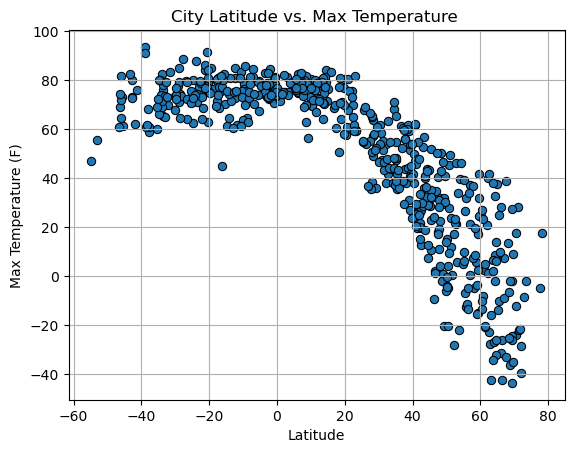

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

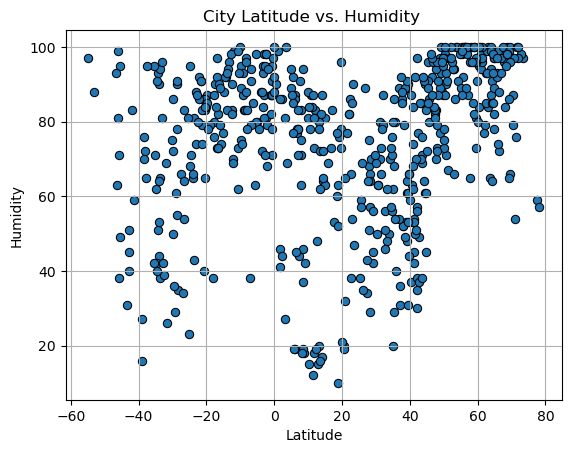

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

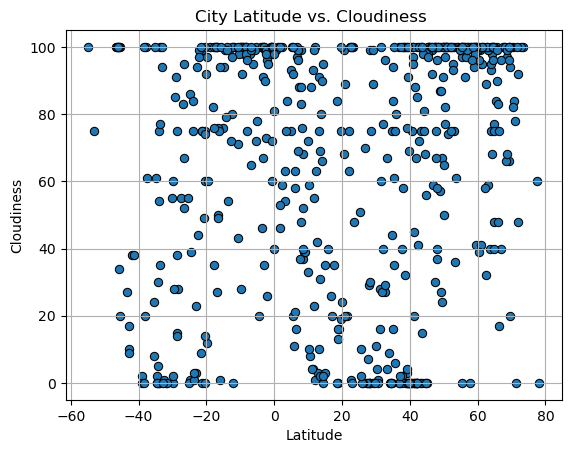

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

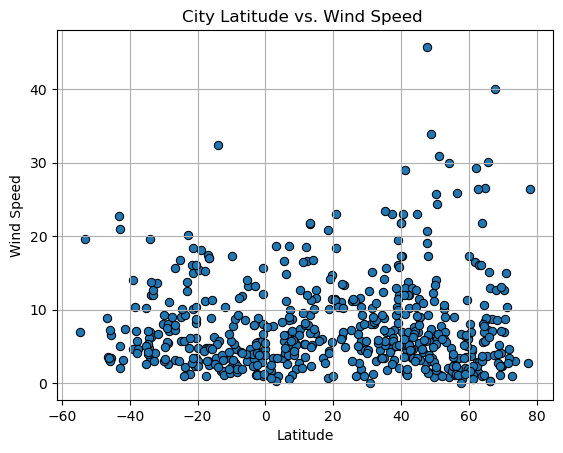

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value**2}")
    plt.show()


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,paamiut,61.9940,-49.6678,20.73,77,100,16.46,GL,1675555598
2,tasiilaq,65.6145,-37.6368,24.96,93,100,30.06,GL,1675555537
3,washington,47.5001,-120.5015,40.59,82,100,2.71,US,1675555500
7,norman wells,65.2820,-126.8329,-13.99,99,84,3.62,CA,1675555629
9,sitka,57.0531,-135.3300,37.29,87,100,3.44,US,1675555559


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,55.51,88,75,19.57,CL,1675555628
4,hobart,-42.8794,147.3294,73.06,51,10,1.99,AU,1675555629
5,new norfolk,-42.7826,147.0587,72.72,45,9,5.01,AU,1675555490
6,general roca,-39.0333,-67.5833,93.61,16,2,14.00,AR,1675555339
8,mataura,-46.1927,168.8643,69.10,81,100,3.20,NZ,1675555630


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7551154990816145


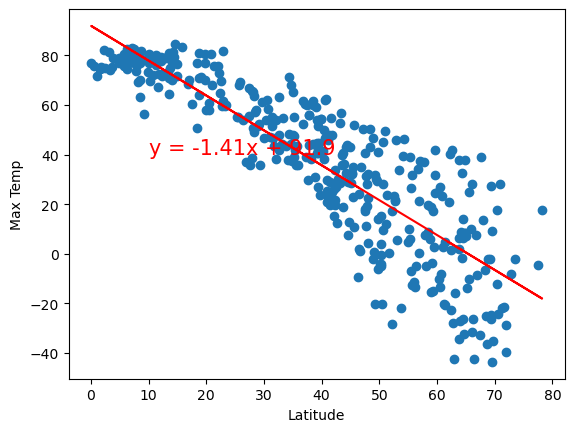

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(10,40))


The r-squared is: 0.06795101634437284


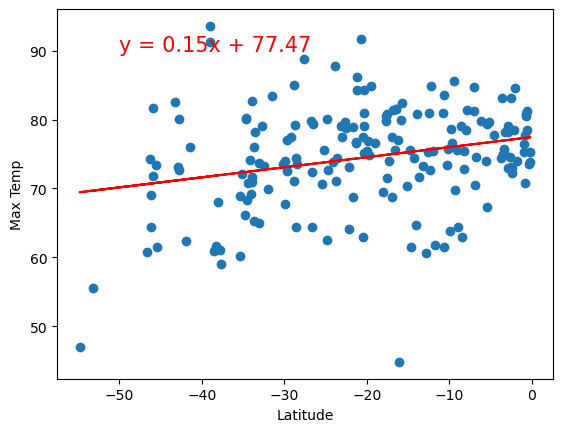

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** Both graphs indicate there is a very strong negative correlation between max temp and latitude. This data strongly suggests that as you move further away from the latitude line the weather gets cooler.  

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21178375376924363


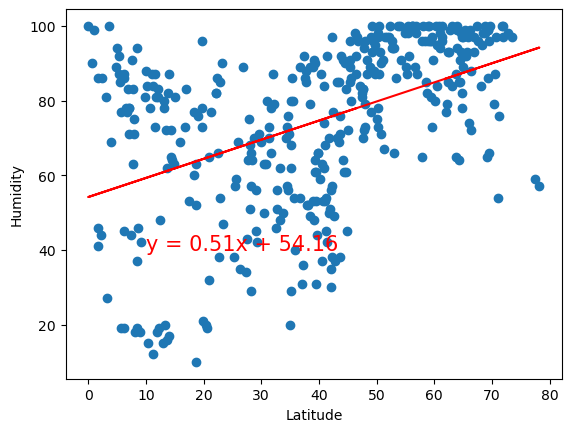

In [53]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Humidity', y_label='Humidity', text_coordinates=(10,40))

The r-squared is: 0.18082198373507416


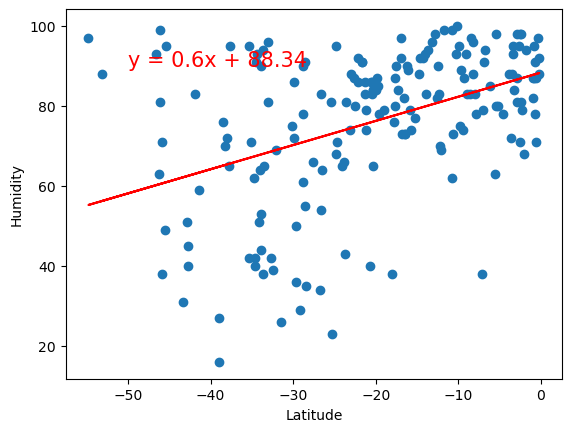

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity',(-50,90))

**Discussion about the linear relationship:** Both graps indicate there is none or a very weak correlation between latitude and humidity. Meaning there is no relationship to changes in humidity as weather patterns moves along latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08568999515911742


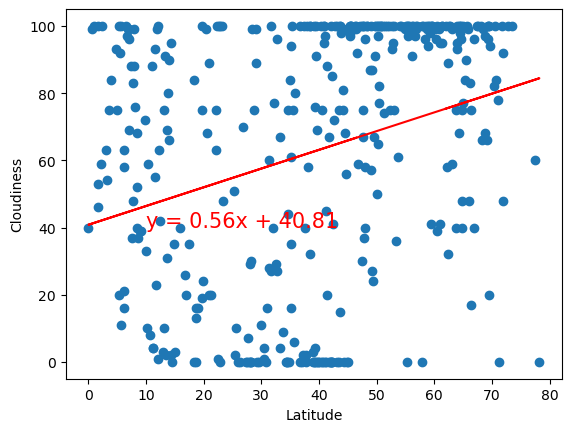

In [55]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Cloudiness', y_label='Cloudiness', text_coordinates=(10,40))

The r-squared is: 0.168328252157461


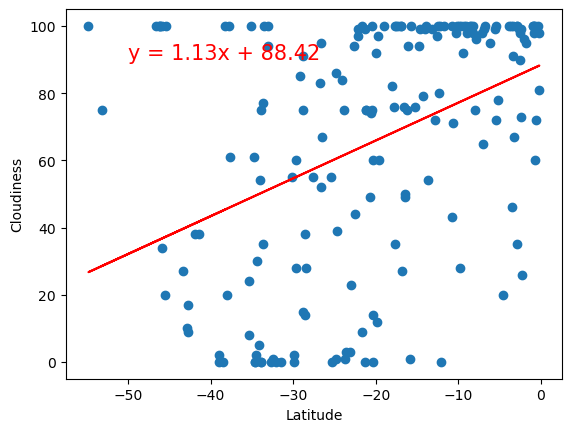

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(-50,90))

**Discussion about the linear relationship:** Both graphs indicate there is no correlation between latitude and cloudiness. Meaning there is no relationship between cloudiness in weather patterns as weather moves along latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0003931447978627136


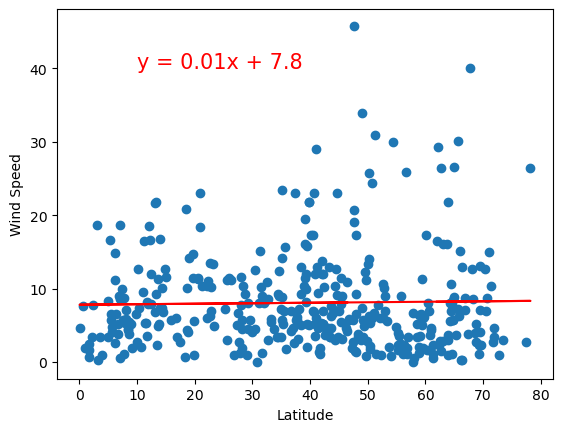

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, title=
                       'Linear Regression on the Northern Hemisphere for Wind Speed', y_label='Wind Speed', text_coordinates=(10,40))

The r-squared is: 0.02160777648448367


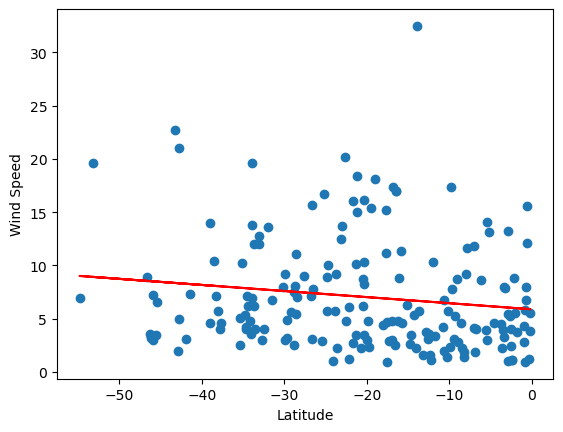

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',text_coordinates=(-50,90))

**Discussion about the linear relationship:** Both graphs indicates there is no correlation between wind speed and latitude. Meaning as weather moves among the latitude line it has no relationship with wind speed. 